<a href="https://colab.research.google.com/github/SeanMuInCa/learn_python/blob/master/cnn_cifar10_classification_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 style='color:blue' align='center'>Small Image Classification Using Convolutional Neural Network (CNN)</h2>

In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification

<img src="small_images.jpg" />

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

<h4 style="color:purple">Load the dataset  (https://www.cs.toronto.edu/~kriz/cifar.html)</h4>  

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
y_test.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


(10000, 1)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
X_train.shape

(50000, 32, 32, 3)

Here we see there are 50000 training images and 1000 test images

In [5]:
y_train.shape  #y_train[1]

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are

In [10]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

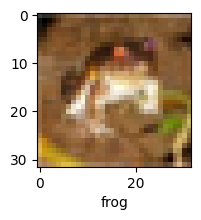

In [11]:
plot_sample(X_train, y_train, 0)

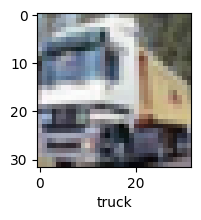

In [12]:
plot_sample(X_train, y_train, 1)  #train:0-49999, test:0-9999

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

<h4 style="color:purple">Normalizing the training data</h4>

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
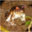

In [13]:
X_train[0]

In [14]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [15]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

<h4 style="color:purple">Build simple artificial neural network for image classification</h4>

In [16]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.3004 - loss: 1.9337
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4163 - loss: 1.6452
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.4526 - loss: 1.5579
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4749 - loss: 1.4886
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4919 - loss: 1.4382


**You can see that at the end of 5 epochs, accuracy is at around 49.7%**

In [17]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.46      0.53      1000
           1       0.49      0.73      0.59      1000
           2       0.50      0.09      0.15      1000
           3       0.44      0.15      0.23      1000
           4       0.65      0.09      0.16      1000
           5       0.39      0.32      0.35      1000
           6       0.56      0.43      0.49      1000
           7       0.23      0.86      0.36      1000
           8       0.67      0.53      0.59      1000
           9       0.53      0.49      0.51      1000

    accuracy                           0.42     10000
   macro avg       0.51      0.42      0.40     10000
weighted avg       0.51      0.42      0.40     10000



<h4 style="color:purple">Now let us build a convolutional neural network to train our images</h4>

In [18]:
cnn = models.Sequential([
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),  # Add Batch Normalization
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),  # Increase neurons in dense layer
    layers.Dropout(0.5),  # Add Dropout for regularization
    layers.Dense(10, activation='softmax')
])




/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#sigmoid output - sum of output not always one
1: 0.45
2: 0.67

#softmax output - sum of output always one
1: 0.45/(0.45+0.67) = 0.4017
2: 0.67/(0.45+0.67) = 0.5982

In [19]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
cnn.fit(X_train, y_train, epochs=15)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 13ms/step - accuracy: 0.3741 - loss: 2.0024
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6113 - loss: 1.1257
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7029 - loss: 0.8785
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.7622 - loss: 0.7199
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8047 - loss: 0.5891
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.8415 - loss: 0.4814
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.8668 - loss: 0.4024
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8886 - loss: 0.3334
Epoch 9/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9077 - loss: 0.2711
Epoch 10/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9209 - loss: 0.2346
Epoch 11/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9334 - loss: 0.2002
Epoch 12

**With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features**

In [21]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8459 - loss: 0.7168


[0.7275508046150208, 0.8428999781608582]

In [22]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


array([[1.9859014e-09, 1.0326606e-09, 6.6093675e-10, 9.9984026e-01,
        4.4379966e-10, 1.5942042e-04, 2.5649675e-07, 2.3388662e-09,
        2.3950570e-09, 7.7899814e-10],
       [5.6866756e-13, 5.6301701e-08, 1.5933220e-21, 2.8330384e-18,
        4.1270864e-23, 2.2486494e-22, 1.3658247e-18, 3.1244358e-26,
        1.0000000e+00, 2.3095473e-11],
       [6.6801680e-05, 1.3391194e-03, 3.8953313e-10, 9.4565564e-08,
        1.0812339e-11, 6.8452057e-11, 9.7817920e-10, 6.5337063e-12,
        9.9859399e-01, 8.8999741e-09],
       [8.6882395e-01, 2.1153846e-06, 4.2716152e-07, 2.1473621e-09,
        2.1675668e-09, 2.1072123e-11, 3.4610922e-10, 2.0789953e-11,
        1.3117348e-01, 1.2040121e-07],
       [2.7857354e-09, 1.5890387e-06, 3.0657927e-06, 2.4425610e-05,
        1.4938089e-06, 1.3417126e-07, 9.9996889e-01, 2.8186897e-10,
        1.4668269e-08, 3.7061989e-07]], dtype=float32)

In [23]:
np.argmax([5,23,3,2])

np.int64(1)

In [24]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(8), np.int64(0), np.int64(6)]

In [25]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

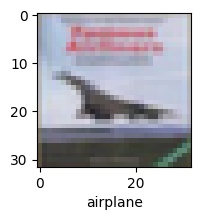

In [26]:
plot_sample(X_test, y_test,3)

In [27]:
classes[y_classes[3]]

'airplane'

# To improve the accuracy of our CNN model:

no of filters,

filter dimension

no of stages of convu+pooling

padding

no of hidden layers in ANN

no of nuerons in each hidden layers

image augumentation

In [28]:
classes[y_classes[3]]

'airplane'

**homework exercise**:

perform image classification usig CIFAR-100 dataset(https://www.tensorflow.org/datasets/catalog/cifar100) and evaluate CNN model accuracy on first 20 superclass .


In [29]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.86      0.85      1000
           1       0.91      0.94      0.93      1000
           2       0.86      0.72      0.78      1000
           3       0.69      0.71      0.70      1000
           4       0.82      0.80      0.81      1000
           5       0.77      0.80      0.78      1000
           6       0.89      0.89      0.89      1000
           7       0.90      0.86      0.88      1000
           8       0.88      0.92      0.90      1000
           9       0.88      0.93      0.90      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [34]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam


datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.2,
    fill_mode='nearest'
)

train_generator = datagen.flow(X_train, y_train, batch_size=64)


cnn = models.Sequential([
    layers.Conv2D(128, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),

    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),

    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(100, activation='softmax')
])


cnn.compile(optimizer=Adam(learning_rate=0.0001),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])


early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
cnn.fit(train_generator, epochs=15, validation_data=(X_test, y_test), callbacks=[early_stop])


Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 65s 69ms/step - accuracy: 0.3059 - loss: 2.2248 - val_accuracy: 0.3988 - val_loss: 1.9065
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 48s 61ms/step - accuracy: 0.4920 - loss: 1.4194 - val_accuracy: 0.4595 - val_loss: 1.8762
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 59ms/step - accuracy: 0.5736 - loss: 1.1894 - val_accuracy: 0.5477 - val_loss: 1.3960
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 58ms/step - accuracy: 0.6234 - loss: 1.0636 - val_accuracy: 0.5321 - val_loss: 1.6047
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 60ms/step - accuracy: 0.6637 - loss: 0.9516 - val_accuracy: 0.6591 - val_loss: 1.0172
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 57ms/step - accuracy: 0.6951 - loss: 0.8674 - val_accuracy: 0.6970 - val_loss: 0.9531
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 48s 61ms/step - accuracy: 0.7244 - loss: 0.7898 - val_accuracy: 0.6940 - val_loss: 0.9383
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 58ms/step - accuracy: 0.7430 - loss: 0.7465 - val_accurac

In [35]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8042 - loss: 0.6124


[0.6083678007125854, 0.8062000274658203]

In [33]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.76      0.82      1000
           1       0.91      0.93      0.92      1000
           2       0.85      0.59      0.70      1000
           3       0.78      0.49      0.60      1000
           4       0.73      0.77      0.75      1000
           5       0.82      0.68      0.75      1000
           6       0.52      0.97      0.68      1000
           7       0.85      0.85      0.85      1000
           8       0.94      0.87      0.90      1000
           9       0.84      0.93      0.89      1000

    accuracy                           0.79     10000
   macro avg       0.81      0.79      0.79     10000
weighted avg       0.81      0.79      0.79     10000

